# Importation des librairies Python nécessaires

In [1]:
from sklearn.datasets import load_iris
import sklearn as sk
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn import metrics

# Affichage des lignes et colonnes

In [2]:
# Afficher toutes les colonnes 
pd.set_option('display.max_columns', None)
# Afficher toutes les lignes 
pd.set_option('display.max_rows', None)
# Définir la largeur d'affichage maximale
pd.set_option('display.max_colwidth', None)

In [3]:
data, target = load_iris(return_X_y = True, as_frame=True)
data.head(10)

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
5,5.4,3.9,1.7,0.4
6,4.6,3.4,1.4,0.3
7,5.0,3.4,1.5,0.2
8,4.4,2.9,1.4,0.2
9,4.9,3.1,1.5,0.1


# Nettoyage

In [4]:
# récupération des types des valeurs
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 4 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   sepal length (cm)  150 non-null    float64
 1   sepal width (cm)   150 non-null    float64
 2   petal length (cm)  150 non-null    float64
 3   petal width (cm)   150 non-null    float64
dtypes: float64(4)
memory usage: 4.8 KB


In [5]:
# Récupération des statistiques générales du Dataframe
data.describe()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [6]:
# Recherche de valeurs nulls
data.isnull().sum()

sepal length (cm)    0
sepal width (cm)     0
petal length (cm)    0
petal width (cm)     0
dtype: int64

In [7]:
# Recherche de valeurs manquantes
data.isna().sum()

sepal length (cm)    0
sepal width (cm)     0
petal length (cm)    0
petal width (cm)     0
dtype: int64

#  Utilisation unique des caractéristiques "petal length" et "petal width"

In [8]:
# Suppresion des colonnes inutiles
datav2 = data.drop(columns=['sepal length (cm)', 'sepal width (cm)'])

# Conversion du Dataframe en array Numpay

In [9]:
data_datav2_np = datav2.to_numpy()
data_target_np = target.to_numpy()

In [10]:
# Pas de feature Scaling car les données sont déjà normalisées.

# Echantillonage des donneés

In [11]:
from sklearn.model_selection import train_test_split
features = ['petal length (cm)', 'petal width (cm)']
X = data_datav2_np
y = data_target_np
# séparation du jeu
X_train, X_test , y_train, y_test = train_test_split(X,y, train_size = 0.8, random_state=42, stratify=y)

# Histogramme

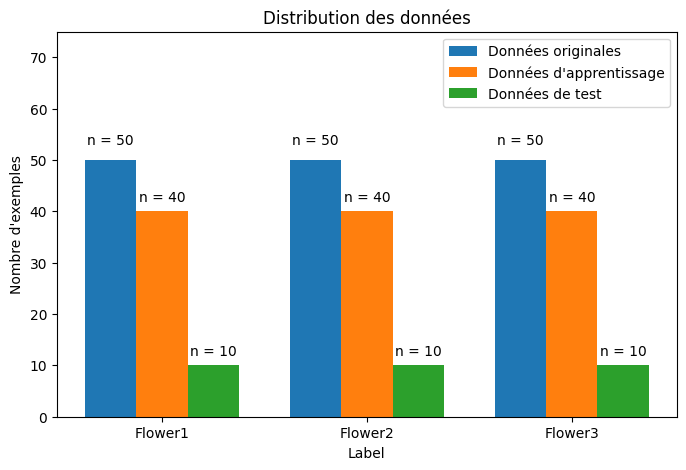

In [15]:
plt.figure(figsize=(8,5), dpi=100)
plt.title("Distribution des données")
plt.hist([y, y_train, y_test],
         bins = [x - 0.5 for x in range(0, 4)],
         rwidth=0.75,
         label=["Données originales", "Données d'apprentissage", "Données de test"])
plt.annotate("n = " + str(np.sum(y == 0)), (-0.25, 53.0), ha='center')
plt.annotate("n = " + str(np.sum(y_train == 0)), (0.0, 42.0), ha='center')
plt.annotate("n = " + str(np.sum(y_test == 0)), (0.25, 12.0), ha='center')

plt.annotate("n = " + str(np.sum(y == 1)), (0.75, 53), ha='center')
plt.annotate("n = " + str(np.sum(y_train == 1)), (1.0, 42), ha='center')
plt.annotate("n = " + str(np.sum(y_test == 1)), (1.25, 12), ha='center')

plt.annotate("n = " + str(np.sum(y == 1)), (1.75, 53), ha='center')
plt.annotate("n = " + str(np.sum(y_train == 1)), (2, 42), ha='center')
plt.annotate("n = " + str(np.sum(y_test == 1)), (2.25, 12), ha='center')

plt.xticks(np.arange(3), ("Flower1", "Flower2","Flower3"))

plt.xlabel("Label")
plt.ylabel("Nombre d'exemples")
plt.ylim(0.0, 75.0)
plt.legend()
plt.show()

## Matrices de confusion

In [16]:
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score,roc_curve, roc_auc_score
cm = confusion_matrix(y_train, y_pred)
print(cm)

[[40  0  0]
 [ 0 40  0]
 [ 0  1 39]]


# Entrainement du modèle

In [12]:
from sklearn.tree import DecisionTreeClassifier
from sklearn import metrics

In [13]:
# Initialiser le modèle d'arbre de décision
decision_tree = DecisionTreeClassifier(max_depth=None)
# Entraîner le modèle sur l'ensemble d'entraînement
decision_tree.fit(X_train, y_train)

DecisionTreeClassifier()

In [14]:
y_pred = decision_tree.predict(X_train)
y_pred

array([0, 2, 1, 0, 1, 2, 1, 2, 2, 2, 2, 1, 1, 1, 1, 0, 0, 2, 2, 0, 1, 0,
       2, 0, 1, 2, 2, 0, 2, 0, 0, 1, 1, 0, 2, 2, 1, 1, 2, 1, 0, 1, 0, 2,
       0, 0, 2, 0, 0, 0, 0, 1, 2, 1, 0, 2, 1, 2, 0, 2, 0, 1, 2, 0, 1, 1,
       2, 1, 1, 2, 0, 0, 0, 2, 1, 2, 1, 2, 2, 1, 0, 2, 1, 0, 2, 0, 2, 1,
       1, 0, 1, 2, 0, 0, 2, 2, 2, 1, 1, 0, 2, 1, 2, 2, 0, 1, 1, 1, 1, 1,
       0, 2, 1, 1, 0, 0, 0, 0, 1, 0])

# Métriques d'évaluation

In [20]:
from sklearn.metrics import classification_report

cr = classification_report(y_train, y_pred) #Precision, Recall, F1-score avec le modèle de plus proches voisins

print(cr)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        40
           1       0.98      1.00      0.99        40
           2       1.00      0.97      0.99        40

    accuracy                           0.99       120
   macro avg       0.99      0.99      0.99       120
weighted avg       0.99      0.99      0.99       120



## Calcul de l'accuracy (Vrais négatif et vrais positifs)

In [24]:
# Autre façon avec une boucle :
def tuning_max_depth(max_depth, random_state=42):
    model = DecisionTreeClassifier(max_depth=max_depth, random_state=random_state)
    model.fit(X_train, y_train)
    pred_train = model.predict(X_train)
    pred_test = model.predict(X_test)
    return pred_train, pred_test

# dictionnaire pour récupérer les résultats
scores = {'train_accuracy': [],
         'test_accuracy': []}
# iterable 
max_depths =[i for i in range(3,11)]

for max_depth in max_depths : 
    # prédictions sur jeu de test et entrainement
    pred_train, pred_test = tuning_max_depth(max_depth) 
    # calcul des metrics pour le jeu d'entrainement
    scores['train_accuracy'].append(metrics.accuracy_score(y_train, pred_train))
    # calcul des metrics pour le jeu de test
    scores['test_accuracy'].append(metrics.accuracy_score(y_test, pred_test))
    
# passage du dictionnaire en Df avec ajout de l'index 
scores_df = pd.DataFrame(scores, index= [i for i in range(3,11)])

scores_df   

,train_accuracy,test_accuracy
3,0.983333,0.966667
4,0.983333,0.933333
5,0.991667,0.933333
6,0.991667,0.933333
7,0.991667,0.933333
8,0.991667,0.933333
9,0.991667,0.933333
10,0.991667,0.933333


In [26]:
# Faire des prédictions sur l'ensemble de test
y_pred = decision_tree.predict(X_train)

[Text(0.375, 0.875, 'x[0] <= 2.45\ngini = 0.667\nsamples = 120\nvalue = [40, 40, 40]'),
 Text(0.25, 0.625, 'gini = 0.0\nsamples = 40\nvalue = [40, 0, 0]'),
 Text(0.5, 0.625, 'x[1] <= 1.65\ngini = 0.5\nsamples = 80\nvalue = [0, 40, 40]'),
 Text(0.25, 0.375, 'x[0] <= 4.95\ngini = 0.133\nsamples = 42\nvalue = [0, 39, 3]'),
 Text(0.125, 0.125, 'gini = 0.0\nsamples = 38\nvalue = [0, 38, 0]'),
 Text(0.375, 0.125, 'gini = 0.375\nsamples = 4\nvalue = [0, 1, 3]'),
 Text(0.75, 0.375, 'x[0] <= 4.85\ngini = 0.051\nsamples = 38\nvalue = [0, 1, 37]'),
 Text(0.625, 0.125, 'gini = 0.444\nsamples = 3\nvalue = [0, 1, 2]'),
 Text(0.875, 0.125, 'gini = 0.0\nsamples = 35\nvalue = [0, 0, 35]')]

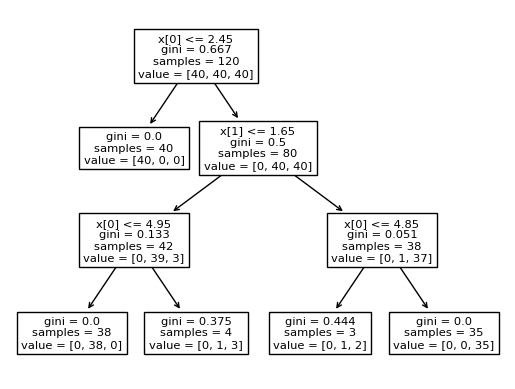

In [27]:
from sklearn.tree import plot_tree

model3 = DecisionTreeClassifier(max_depth=3, random_state=42)

model3.fit(X_train, y_train)

plot_tree(model3)

# Synthèse et Conclusions

On observe que l'accuracy est la plus performante lorsqu'il y a une profondeur de 5 sur le jeu de d'entrainement.
On observe que l'accuracy est la plus performante lorsqu'il y a une profondeur de 3 sur le jeu de test.

Les résultats des métriques dépendent du jeu de donnée. Il faut faire attention à la généralisation et à l'overfitting.